In [1]:
import network as net
from mnist_loader import load_mnist_data, load_test_data, export_data, load_train_data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, KFold
from functions import *

In [2]:
train, valid, test = load_mnist_data()
train = load_train_data("train_expanded.csv")
len(train)

84000

In [3]:
EPOCHS = 150
RS = None

start = time.time()
functions = [Sigmoid, ReLU]
netw = net.Network([784, 100, 10], func=functions, random_state=RS)
netw.set_monitoring(evaluation_accuracy=True,
                    evaluation_cost=True, 
                    training_accuracy=False, 
                    training_cost=False,
                    learning_rate=True)
netw.SGD(train, 0.05, EPOCHS, 10, evaluation_data=test, 
                  lmbda=5., mu=0.8, n_epoch=10, factor=(2, 6))
print("%s seconds" % (time.time()-start))
result = (netw.accuracy_test, netw.cost_test)

Epoch 1 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 94.514286 
    | Cost:     0.632426

Epoch 2 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 95.885714 
    | Cost:     0.665906

Epoch 3 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 96.450000 
    | Cost:     0.692378

Epoch 4 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 96.614286 
    | Cost:     0.718224

Epoch 5 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 96.700000 
    | Cost:     0.747068

Epoch 6 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 97.021429 
    | Cost:     0.749892

Epoch 7 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 97.000000 
    | Cost:     0.776435

Epoch 8 training complete
---learning rate=0.050000---
 evaluation data
    | Accuracy: 97.071429 
    | Cost:     0.778628



In [4]:
test_kaggle = load_test_data("test.csv")
export_data("net_v2.csv", netw.predict(test_kaggle))

In [5]:
def visualisation(acc, cf, figsize=(10, 5)):
    color_cf = None
    if type(acc[0]) != list:
        acc = [acc]
        cf = [cf]
        color_cf = "orange" 
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(figsize)
    epochs = len(acc[0])
    for acc_i, cf_i in zip(acc, cf):
        ax1.plot(range(1, epochs+1), np.array(acc_i)*100)
        ax2.plot(range(1, epochs+1), cf_i, color=color_cf)

    for ax in (ax1, ax2):
        ax.spines["right"].set_visible(False)    
        ax.spines["top"].set_visible(False)
        ax.tick_params(bottom=False, left=False)
        
    ax1.set_title("Accuracy")
    ax2.set_title("Mean cost function")

    plt.show()

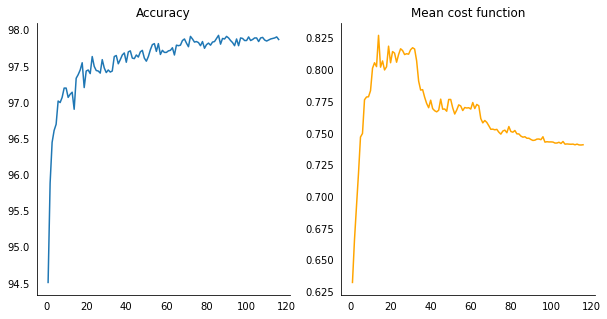

In [6]:
# acc, cf, acc_t, cf_t = result
visualisation(*result)

In [7]:
netw.best_accuracy*100

97.92857142857143

In [ ]:
netw.save_json("net_v2_relu-sigmoid-h100-expandeddataset.json")
netw.save_pickle("net_v2_relu-sigmoid-h100-expandeddataset.json")